In [2]:
!pip install scikit-surprise

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import os
import glob
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from zipfile import ZipFile
from collections import defaultdict

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix

# Surprise package for making recommendation
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise.model_selection import GridSearchCV, cross_validate, KFold
from surprise import accuracy, Reader, Dataset, dump
from surprise import NormalPredictor
from surprise import Prediction

# filterwarnings to ignore all unnecessary warnings and logs
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Merge all the provided CSVs into one dataFrame

df1=pd.read_csv('phone_user_review_file_1.csv', encoding='ISO-8859-1')
df2=pd.read_csv('phone_user_review_file_2.csv', encoding='ISO-8859-1')
df3=pd.read_csv('phone_user_review_file_3.csv', encoding='ISO-8859-1')
df4=pd.read_csv('phone_user_review_file_4.csv', encoding='ISO-8859-1')
df5=pd.read_csv('phone_user_review_file_5.csv', encoding='ISO-8859-1')
df6=pd.read_csv('phone_user_review_file_6.csv', encoding='ISO-8859-1')

combined_phone_user_review_df = pd.concat([df1, df2, df3, df4, df5, df6]) 

combined_phone_user_review_df.head(50)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
5,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8
6,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8
7,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8
8,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,6.0,10.0,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8
9,/cellphones/samsung-galaxy-s8/,5/10/2017,en,us,Verizon Wireless,verizonwireless.com,8.0,10.0,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8


In [5]:
combined_phone_user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


## There are 1415133 rows and 11 columns 

In [6]:
# Explore, understand the Data and share at least 2 observations.

combined_phone_user_review_df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


In [7]:
# Round off scores to the nearest integers

combined_phone_user_review_df = combined_phone_user_review_df.copy()
combined_phone_user_review_df.shape

(1415133, 11)

In [8]:
combined_phone_user_review_df['score'] = round(combined_phone_user_review_df['score'])

combined_phone_user_review_df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [9]:
# Check for missing values. Impute the missing values, if any.

combined_phone_user_review_df.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [10]:
combined_phone_user_review_df['score_max'].value_counts()

10.0    1351644
Name: score_max, dtype: int64

In [11]:
# We will fill null values in "Score max" column with mean 
combined_phone_user_review_df['score_max'] = combined_phone_user_review_df['score_max'].fillna(combined_phone_user_review_df['score_max'].mean())

# We will fill null values in "Score" column with median
combined_phone_user_review_df['score'] = combined_phone_user_review_df['score'].fillna(combined_phone_user_review_df['score'].median())

# Dropping one null value in "Product" column
combined_phone_user_review_df.dropna(subset=['product'],inplace=True)

combined_phone_user_review_df.isna().sum()


phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      19361
author       63201
product          0
dtype: int64

In [12]:
# Check for duplicate values and remove them, if any.

duplicate = combined_phone_user_review_df[combined_phone_user_review_df.duplicated(subset=['phone_url','date','lang','country','extract','author','product'])]
duplicate

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
342,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
343,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
371,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Tot nu toe in de eerste dagen weinig tot geen ...,Robin Winckens,Samsung Galaxy S8 Zwart
452,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Wat een huge scherm!,B Yapar,Samsung Galaxy S8 Zwart
3718,/cellphones/samsung-galaxy-s6-edgeplus/,10/4/2015,en,us,Amazon,amazon.com,10.0,10.0,"For readers, my opinions on this device (ATT 3...",FrozenCloud,"Samsung Galaxy S6 Edge+, Black 64GB (Verizon W..."
...,...,...,...,...,...,...,...,...,...,...,...
158568,/cellphones/samsung-sgh-2400/,7/21/2000,en,gb,Ciao,ciao.co.uk,6.0,10.0,The more expensive of the Samsung series but l...,cellnetsms,Samsung SGH 2400
158911,/cellphones/samsung-sgh-600/,4/30/2015,tr,tr,Cepworld,cepworld.com,9.0,10.0,varsa satan 05312614607,muhsin,Samsung (936) SGH-600
159375,/cellphones/alcatel-ot-easy/,11/13/2009,es,es,Dooyoo,dooyoo.es,6.0,10.0,en la opi,NaN,Alcatel One Touch Easy
160164,/cellphones/philips-genie-2000/,8/20/2000,it,it,Ciao,ciao.it,8.0,10.0,"Il Genie e' un buon telefono, scorrimente del ...",tonyblack,Philips Genie 2000


In [13]:
combined_phone_user_review_df.drop_duplicates(subset=['phone_url','date','lang','country','extract','author','product'],keep='first',inplace=True)
combined_phone_user_review_df.duplicated(subset=['phone_url','date','lang','country','extract','author','product']).sum()

0

In [14]:
# Keep only 1 Million data samples. Use random state=612.

combined_phone_user_review_df = combined_phone_user_review_df.sample(n=1000000, random_state=612)
combined_phone_user_review_df.shape

(1000000, 11)

In [15]:
# Drop irrelevant features. Keep features like Author, Product, and Score.

df_mobile_final = combined_phone_user_review_df[['author','product','score']]
df_mobile_final.head(10)

,author,product,score
46198,ÐÐ°ÑÑ.Ñ,Nokia 6600i Slide,6.0
216456,Alex H,"Lenovo Moto G4 Plus Smartphone (14 cm (5,5 Zol...",10.0
147812,Delorion,Sharp GX10,6.0
98325,LoveMySamsung7301,Samsung Galaxy S6 32GB (Cricket),10.0
245296,AmazonCruiser,"Sony Xperia SP Smartphone (11,7 cm (4,6 Zoll) ...",2.0
147768,Amazon Customer,"HTC Desire 10 Lifestyle (Polar White, 32 GB) -...",10.0
157787,Simon,"Sony Xperia Z5 Smartphone (5,2 Zoll (13,2 cm) ...",8.0
264084,Amazon Customer,Apple iPhone 6 64GB GOLD UNLOCKED,10.0
30865,CHRISTINA HALLER,"LG G3, Shine Gold 32GB (Sprint)",2.0
265324,ÐÐ¸Ð¼Ð°,Oppo Find 5 X909 16 Gb White Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½,10.0


In [16]:
df_mobile_final.shape

(1000000, 3)

In [17]:
# Identify the most rated products.

df_mobile_final.groupby('product')['score'].count().sort_values(ascending=False).head()

product
Lenovo Vibe K4 Note (White,16GB)     3681
Lenovo Vibe K4 Note (Black, 16GB)    3106
OnePlus 3 (Graphite, 64 GB)          2896
OnePlus 3 (Soft Gold, 64 GB)         2523
Samsung Galaxy Express I8730         1875
Name: score, dtype: int64

In [18]:
# Identify the users with most number of reviews. 

df_mobile_final.groupby('author')['score'].count().sort_values(ascending=False).head()  

author
Amazon Customer    54621
Cliente Amazon     13670
e-bit               6025
Client d'Amazon     5461
Amazon Kunde        3387
Name: score, dtype: int64

In [19]:
# Select the data with products having more than 50 ratings. 
# And, users who have given more than 50 ratings. Report the shape of the final dataset.

df_grp1 = pd.DataFrame(df_mobile_final.groupby('product').count())
filter1 = df_grp1['author'] > 50
filter2 = df_grp1['score'] > 50
df_grp1.where(filter1 & filter2,inplace=False).dropna().shape

(4096, 2)

In [20]:
df_grp1.where(filter1 & filter2,inplace=False).dropna().head(10)

,author,score
product,,
3100 / 3120,55.0,55.0
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),78.0,78.0
6126 / 6131 / 6133,88.0,88.0
6682 / 6681,63.0,65.0
"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)",58.0,58.0
"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)",60.0,60.0
"AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)",185.0,185.0
"AICEK Coque Samsung Galaxy J3 2016, AICEK Etui Silicone Gel Samsung Galaxy J3 2016 (J320F) Housse Antichoc Samsung J3 Transparente Souple Coque De Protection Pour Samsung Galaxy J3 2016 (5,0 Pouces)",66.0,66.0
"APPLE iPhone 6s Plus - 128 GB, Rose Gold",112.0,112.0


## Build a popularity based model and recommend top 5 mobile phones. 

In [21]:
ratings_mean_count = pd.DataFrame(df_mobile_final.groupby('product')['score'].mean()) 

In [22]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df_mobile_final.groupby('product')['score'].count())  

In [23]:
ratings_mean_count.head()

,score,rating_counts
product,,
"'Smartphone Meizu Pro 5, 5,7 pouces avec Exynos 7420 Octa 8 Core Processeur. mÃ©moire RAM 4 Go et 64 Go mÃ©moire...",8.0,1
"'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.0,1
"'Sony Xperia X (F5122) â rosa â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.0,1
"(7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;blanc)-Smartphone",6.0,1
"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core Android 4.2.2 3G Phone 8MP CAM 512MB RAM 4GB ROM",8.0,1


In [24]:
ratings_mean_count['top'] = ratings_mean_count['rating_counts']*ratings_mean_count['score']

In [25]:
# Top 5 mobile phones
ratings_mean_count.sort_values(by='top', ascending=False).head(5)

,score,rating_counts,top
product,,,
"Lenovo Vibe K4 Note (White,16GB)",7.186634,3681,26454.0
"OnePlus 3 (Graphite, 64 GB)",8.698895,2896,25192.0
"Lenovo Vibe K4 Note (Black, 16GB)",7.227946,3106,22450.0
"OnePlus 3 (Soft Gold, 64 GB)",8.514467,2523,21482.0
Samsung Galaxy Express I8730,9.008000,1875,16890.0


## Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.

In [26]:
reader = Reader(rating_scale=(1, 10))

In [27]:
df_mobile_sample = df_mobile_final.sample(n=5000,random_state=42)
df_mobile_sample.shape

(5000, 3)

In [28]:
data = Dataset.load_from_df(df_mobile_sample[['author','product','score']], reader = reader)
data.df

,author,product,score
155862,fenice1010,Ericsson A2618s,8.0
129041,Davide,"Alcatel One Touch Pop C5 Smartphone, Dual SIM,...",10.0
154830,sexy,Samsung G890A Unlocked Galaxy S6 Active 32GB G...,2.0
229258,SE_Gage,"Microsoft Nokia 1616 Handy (UKW-Radio, Farbdis...",10.0
205261,Matthew,LG Electronics Nexus 5X 32 GB SIM-Free Android...,6.0
...,...,...,...
170380,Dhinesh don,Huawei Honor 4X (White),2.0
254929,xceday,Nokia X3 CEP TELEFONU,9.0
117335,Amazon Customer,TP-Link AC1300 Wireless Dual Band PCI-Express ...,10.0
278979,eriktatjana,"Sony Xperia T Smartphone, 4.6 Pollici HD, Bian...",8.0


In [29]:
# Implement SVD 
from surprise.model_selection import train_test_split
from surprise import SVD, accuracy

In [30]:
svd_model = SVD ()

X, y = train_test_split(data,test_size=0.25,random_state=42)

In [31]:
svd_model.fit(X)

In [32]:
y_pred = svd_model.test(y)
accuracy.rmse(y_pred)

RMSE: 2.5881


2.5880611105140536

In [33]:
y_pred

[Prediction(uid='Josh Sisson', iid='Samsung Galaxy S4 Active I537 Unlocked GSM 4G LTE Android Smartphone w/ 13MP Camera - Dive Blue - AT&T - No Warranty', r_ui=8.0, est=8.01094720592515, details={'was_impossible': False}),
 Prediction(uid='CRISTIANARIEL', iid='Nokia N95', r_ui=10.0, est=8.427822345323776, details={'was_impossible': False}),
 Prediction(uid=nan, iid='Sony Ericsson C702i', r_ui=9.0, est=7.218610871538262, details={'was_impossible': False}),
 Prediction(uid='ramon', iid='Samsung Galaxy S7 G930F 32GB Factory Unlocked GSM Smartphone International Version (Gold)', r_ui=10.0, est=7.507894232728789, details={'was_impossible': False}),
 Prediction(uid='Freizeitleserin', iid='LG Electronics KM900 Arena Smartphone (Dolby Mobile Surround, FM Transmitter, GPS, 5MP,WLAN ) silber', r_ui=2.0, est=8.16656911640588, details={'was_impossible': False}),
 Prediction(uid='BrokerM', iid='Nokia 7110', r_ui=10.0, est=8.320807687276595, details={'was_impossible': False}),
 Prediction(uid='Steff

In [34]:
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred])

In [35]:
test_pred_df.head()

,0,1,2
0,Josh Sisson,Samsung Galaxy S4 Active I537 Unlocked GSM 4G ...,8.010947
1,CRISTIANARIEL,Nokia N95,8.427822
2,NaN,Sony Ericsson C702i,7.218611
3,ramon,Samsung Galaxy S7 G930F 32GB Factory Unlocked ...,7.507894
4,Freizeitleserin,LG Electronics KM900 Arena Smartphone (Dolby M...,8.166569


In [36]:
# User Based Model
knn_model_user = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})

knn_model_user.fit(X)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [37]:
# Item Based Model
knn_model_item = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})

knn_model_item.fit(X)

Computing the cosine similarity matrix...
Done computing similarity matrix.


## Evaluate the collaborative model. Print RMSE value.

In [38]:
y_pred_user = knn_model_user.test(y)
y_pred_item = knn_model_item.test(y)

In [39]:
print("User-based Model : Accuracy RMSE)")
accuracy.rmse(y_pred_user)

User-based Model : Accuracy RMSE)
RMSE: 2.5787


2.5786910745551808

In [40]:
print("Item-based Model : Accuracy RMSE)")
accuracy.rmse(y_pred_item)

Item-based Model : Accuracy RMSE)
RMSE: 2.6200


2.6199580494337193

In [41]:
# User based model test prediction output
test_pred_user_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred_user])
test_pred_user_df.head(5)

,0,1,2
0,Josh Sisson,Samsung Galaxy S4 Active I537 Unlocked GSM 4G ...,8.004800
1,CRISTIANARIEL,Nokia N95,8.004800
2,NaN,Sony Ericsson C702i,8.164634
3,ramon,Samsung Galaxy S7 G930F 32GB Factory Unlocked ...,8.004800
4,Freizeitleserin,LG Electronics KM900 Arena Smartphone (Dolby M...,8.004800


In [42]:
# Item based model test prediction output
test_pred_item_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred_item])
test_pred_item_df.head(5)

,0,1,2
0,Josh Sisson,Samsung Galaxy S4 Active I537 Unlocked GSM 4G ...,8.0048
1,CRISTIANARIEL,Nokia N95,8.0048
2,NaN,Sony Ericsson C702i,8.0000
3,ramon,Samsung Galaxy S7 G930F 32GB Factory Unlocked ...,8.0048
4,Freizeitleserin,LG Electronics KM900 Arena Smartphone (Dolby M...,8.0048


## Predict score (average rating) for test users.

In [43]:
# Predict score for one sample test user
knn_model_user.predict(uid="Josh Sisson",iid="Samsung Galaxy S4 Active I537 Unlocked GSM 4G LTE Android Smartphone w/ 13MP Camera - Dive Blue - AT&T - No Warranty")

Prediction(uid='Josh Sisson', iid='Samsung Galaxy S4 Active I537 Unlocked GSM 4G LTE Android Smartphone w/ 13MP Camera - Dive Blue - AT&T - No Warranty', r_ui=None, est=8.0048, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [44]:
# Predicted value for all test users
y_pred_user

[Prediction(uid='Josh Sisson', iid='Samsung Galaxy S4 Active I537 Unlocked GSM 4G LTE Android Smartphone w/ 13MP Camera - Dive Blue - AT&T - No Warranty', r_ui=8.0, est=8.0048, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='CRISTIANARIEL', iid='Nokia N95', r_ui=10.0, est=8.0048, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=nan, iid='Sony Ericsson C702i', r_ui=9.0, est=8.164634146341463, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ramon', iid='Samsung Galaxy S7 G930F 32GB Factory Unlocked GSM Smartphone International Version (Gold)', r_ui=10.0, est=8.0048, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Freizeitleserin', iid='LG Electronics KM900 Arena Smartphone (Dolby Mobile Surround, FM Transmitter, GPS, 5MP,WLAN ) silber', r_ui=2.0, est=8.0048, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),


<AxesSubplot:xlabel='score', ylabel='count'>

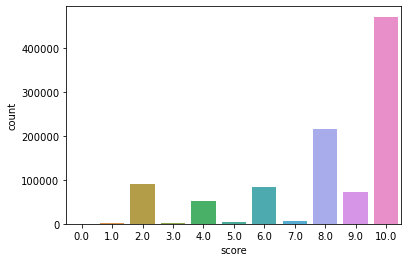

In [45]:
# Report your findings and inferences

sns.countplot(df_mobile_final['score'])

## - Large number of users gave ratings on a higher end
## - Collaborative filtering model can be used to provide recommendations to the users

In [46]:
# Try and recommend top 5 products for test users.

df_pred = pd.DataFrame(y_pred_user)

In [47]:
# function that takes in user and number of recommendations as an input and returns the recommended products
def recommendations(user, n):
    
    recommended_products = df_pred [df_pred['uid'] == user][['uid','iid','est']].sort_values('est', ascending=False).head(n)
  
    return recommended_products

In [48]:
# top 5 products
recommendations('Amazon Customer',5)

,uid,iid,est
257,Amazon Customer,"Mi 4i (Grey, 16GB)",10.000000
790,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",10.000000
811,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",10.000000
1233,Amazon Customer,"OnePlus X (Onyx, 16GB)",9.322115
116,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)",9.162126


In [49]:
recommendations('Cliente Amazon',5)

,uid,iid,est
74,Cliente Amazon,Samsung Galaxy I9060I Grand Neo Plus Smartphon...,8.0048
215,Cliente Amazon,Desconocido Xiaomi Redmi Note 2 - Smartphone l...,8.0048
480,Cliente Amazon,"WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Bianco",8.0048
497,Cliente Amazon,Doogee F5 - Smartphone libre 4G Lte (Pantalla ...,8.0048
564,Cliente Amazon,"Huawei P8 Lite 2017 Smartphone, 16 GB, Nero",8.0048


In [50]:
recommendations('e-bit',5)

,uid,iid,est
56,e-bit,Smartphone Lenovo Vibe K5,8.533333
33,e-bit,Smartphone Samsung Galaxy Gran Prime TV SM-G530,8.174204
479,e-bit,Celular LG Messenger GT360,8.004800
736,e-bit,Asus ZenFone 2 ZE551ML 16GB Z3560,8.004800


<AxesSubplot:>

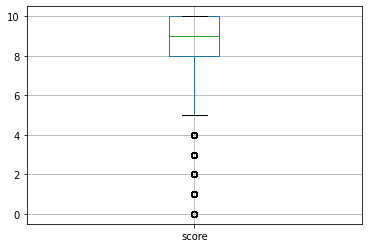

In [51]:
# Checking for outliers and dealing with then as required 
df_mobile_final.boxplot()

In [52]:
Q1 = np.percentile(df_mobile_final['score'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df_mobile_final['score'], 75, interpolation = 'midpoint') 
Q1, Q3

(8.0, 10.0)

In [53]:
IQR = Q3 - Q1
max_range = Q3 + (IQR * 1.5)
min_range = Q1 - (IQR * 1.5)
min_range, max_range

(5.0, 13.0)

In [54]:
df_mobile_final[df_mobile_final['score'] > 13]

,author,product,score


In [55]:
df_mobile_final[df_mobile_final['score'] < 5]

,author,product,score
245296,AmazonCruiser,"Sony Xperia SP Smartphone (11,7 cm (4,6 Zoll) ...",2.0
30865,CHRISTINA HALLER,"LG G3, Shine Gold 32GB (Sprint)",2.0
21830,lady_thunder,LG Optimus F7 LG870,2.0
88025,NaN,HTC Radar,2.0
9587,Miguel Angel,DOOGEE X5 MAX Smartphone Libre 3G WCDMA (Andro...,2.0
...,...,...,...
173332,Gerhard,"Samsung Galaxy Xcover S5690 Smartphone (9,3 cm...",2.0
20540,Shanmukh,Lenovo Vibe K5 (Grey),2.0
255816,fsvu76,Fly E145,2.0
48902,Amazon Customer,"Lenovo Vibe K4 Note (White,16GB)",2.0


In [56]:
df_mobile_new = df_mobile_final.copy()
df_mobile_new.loc[df_mobile_new['score'] < 5.0, 'score'] = 5.0

<AxesSubplot:>

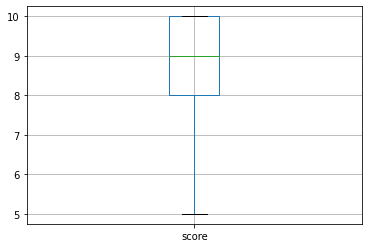

In [57]:
df_mobile_new.boxplot()

In [58]:
df_mobile_new_sample = df_mobile_new.sample(n=5000,random_state=42)

In [59]:
data_new = Dataset.load_from_df(df_mobile_sample[['author','product','score']], reader = reader)

In [60]:
svd_model_new = SVD ()

X_train, y_test = train_test_split(data_new,test_size=0.25,random_state=42)

In [61]:
svd_model_new.fit(X_train)

In [62]:
y_pred_new = svd_model_new.test(y_test)
accuracy.rmse(y_pred_new)

RMSE: 2.5909


2.590887047070611

In [63]:
# Trying cross validation to get better results. 

cross_validate(svd_model_new, data_new, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.5179  2.5675  2.5841  2.6458  2.5065  2.5644  0.0501  
MAE (testset)     1.8989  2.0096  1.9810  2.0197  1.9429  1.9704  0.0446  
Fit time          0.36    0.38    0.36    0.35    0.34    0.36    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([2.51788513, 2.56748945, 2.58411487, 2.64580886, 2.50653578]),
 'test_mae': array([1.89885353, 2.00964366, 1.98098192, 2.01969116, 1.94294023]),
 'fit_time': (0.35905027389526367,
  0.3810739517211914,
  0.35878872871398926,
  0.35448503494262695,
  0.3373250961303711),
 'test_time': (0.0074040889739990234,
  0.010695934295654297,
  0.008516073226928711,
  0.006886005401611328,
  0.006823301315307617)}

# Findings and inferences : 

- Lenovo Vibe K4 is the most rated product. 
- Amazon Customer and cliente amazon iare  the most active author who write reviews. 
- Cross validation did not much affect the RMSE values.

# In what business scenario you should use popularity based Recommendation Systems ?

1. Popularity based recommendation system relies on the popularity, trends and frequency counts of which items were most purchased.
2. If we are not having user historical data then we will go for popularity based recommendation systems
3. We can use this recommendation on first day of the business based on certain filtering conditions
4. It can be used required to show most popular items in different categories along with personalized results like:
- Most popular trend in western wear clothes or traditional wear clothes.
- Most popular hindi songs or most popular english songs on a music website/app.
- Most popular dishes of the restaurant (Recommended dishes in swiggy)
- Most popular holiday packages for hiking trips, or bike trips or himalayan trips etc.
- To find out trending News or Movies

# In what business scenario you should use CF based Recommendation Systems ?

Collaborative Filtering is used to building intelligent recommender systems that can learn to give better recommendations as more information about users is collected. It is a personalised recommender system, recommendations are made based on the past behaviour of the user. Most websites like Amazon, YouTube, and Netflix use collaborative filtering as a part of their sophisticated recommendation system.


# What other possible methods can you think of which can further improve the recommendation for different users ?
## - Content Based Recommendation system
## - Demography based
## - Classification Model based
## - Hybrid Approaches
## - Association Rule Mining

This works best while the business is in it's nascent stage. This recommendation system will help the users get a good recommendation to start with and once the buyers have a purchased history, the recommendation engine can use the model based collaborative filtering technique.